## **EDA With Students Performance Indicator**

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./dataset/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## **3. Data Checks to Perform**
- Check Missing values
- Check Duplicates
- Check Data Type
- Check Number of Unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
# Check Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
# Check Duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [20]:
df.duplicated().sum()

0

In [13]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
# Check Number of Unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.race_ethnicity.unique()

In [17]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [19]:
# Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## **Insights or Observation**
- From the above description of numerical data, all means are very close to each other - between 66 and 69
- All the standard deviation are also between 14.6 - 15.19
- While there is a minimum of 0 for maths, other are having 17 and 10 value

In [33]:
# Segrregate Numerical and Categorical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [35]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [34]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [38]:
# Add total and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

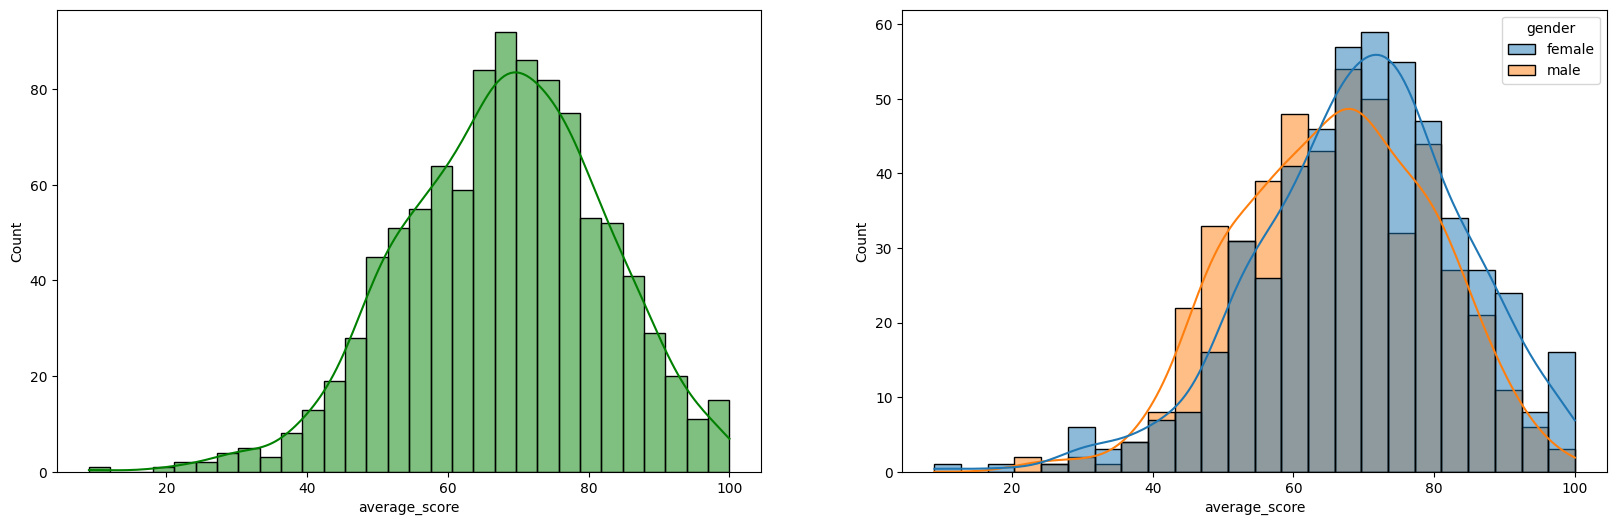

In [55]:
# Explore Visualization
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.histplot(data=df, x="average_score", color="g", kde=True, bins=30)
plt.subplot(122)
sns.histplot(data=df, x="average_score", hue="gender", kde=True)

## **Insights or Observation**
- Female students tend to perform well than Male students

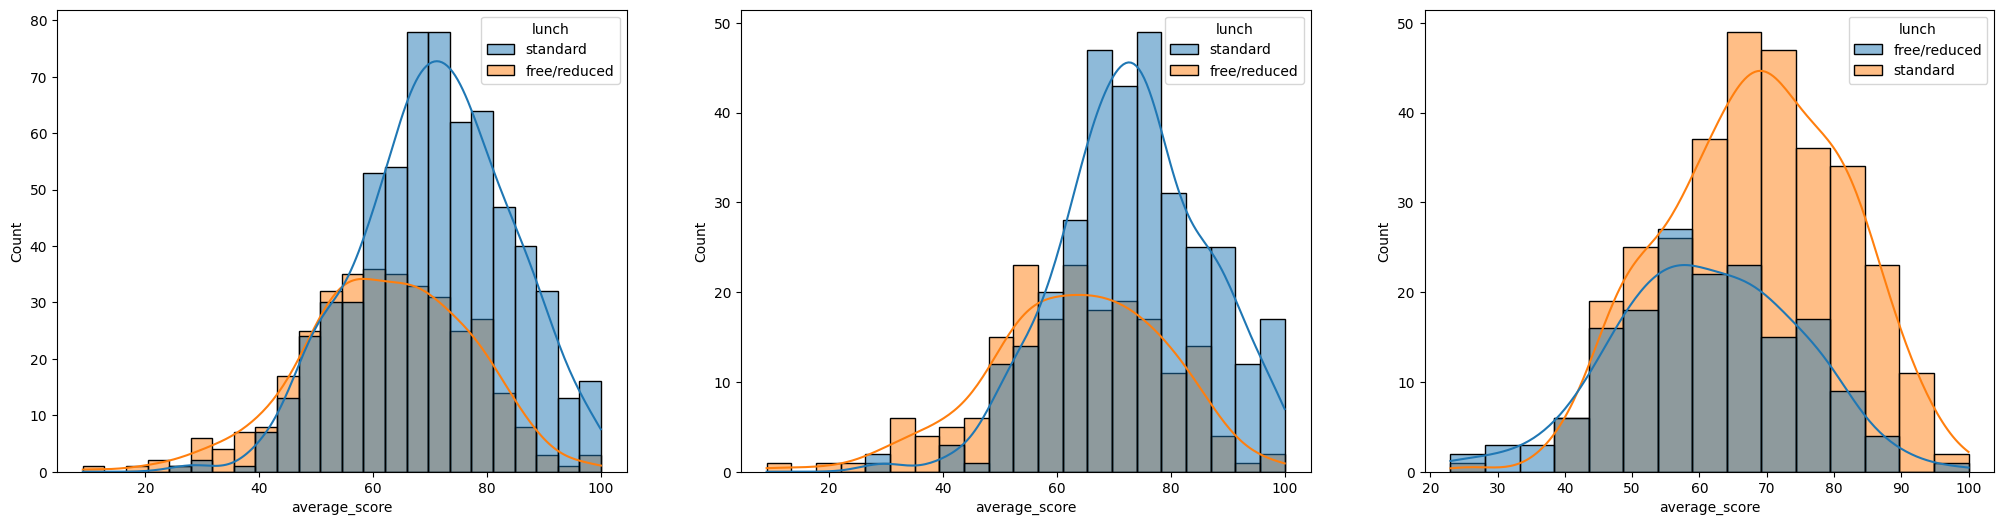

In [68]:
# Explore More Visualization 
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x="average_score", hue="lunch", kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="lunch", kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x="average_score", hue="lunch", kde=True)
plt.show()

## **Insights or Observation**
- Standard lunch helps student to perform well in exams
- Stabdard lunch helps to perform well in exams for both Male and Female Students

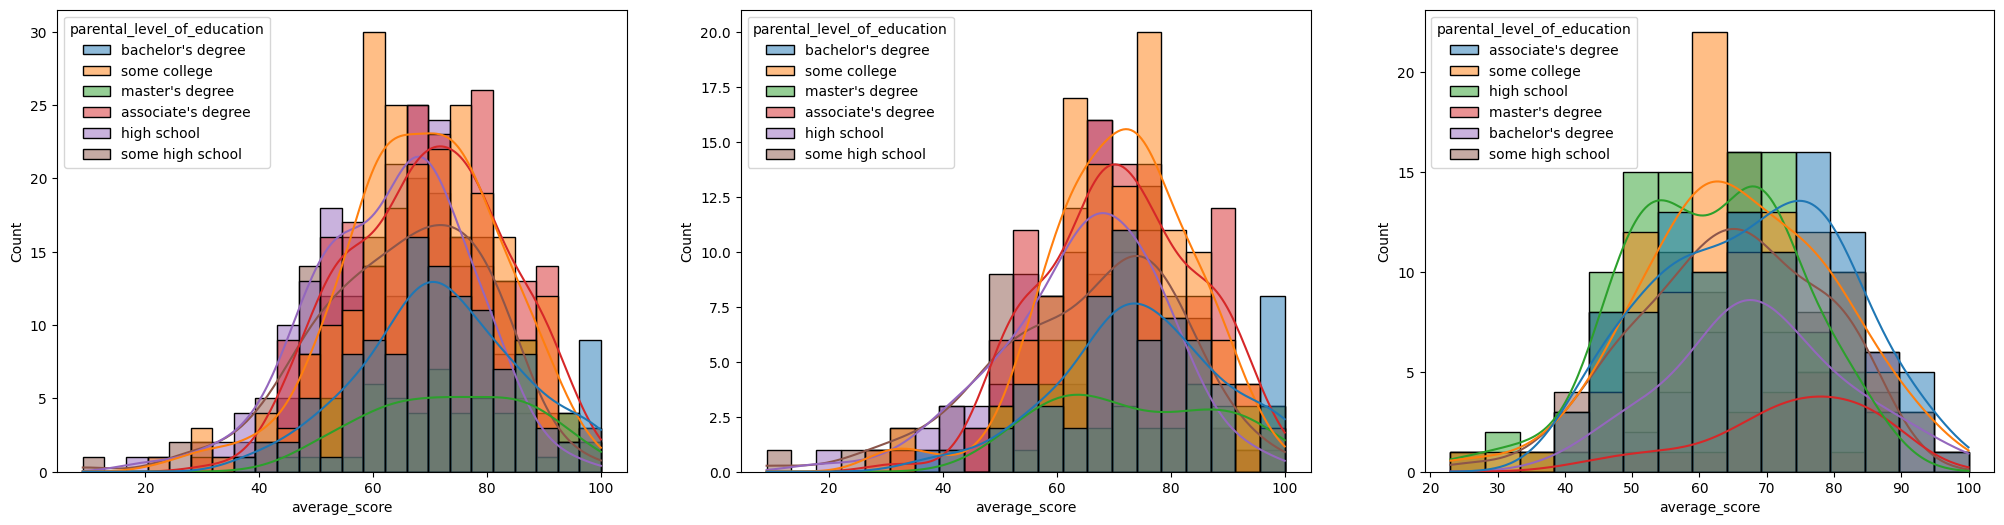

In [69]:
# Explore More Visualization 
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x="average_score", hue="parental_level_of_education", kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="parental_level_of_education", kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x="average_score", hue="parental_level_of_education", kde=True)
plt.show()

## **Insights or Observation**
- In general parent's education don't help student to perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

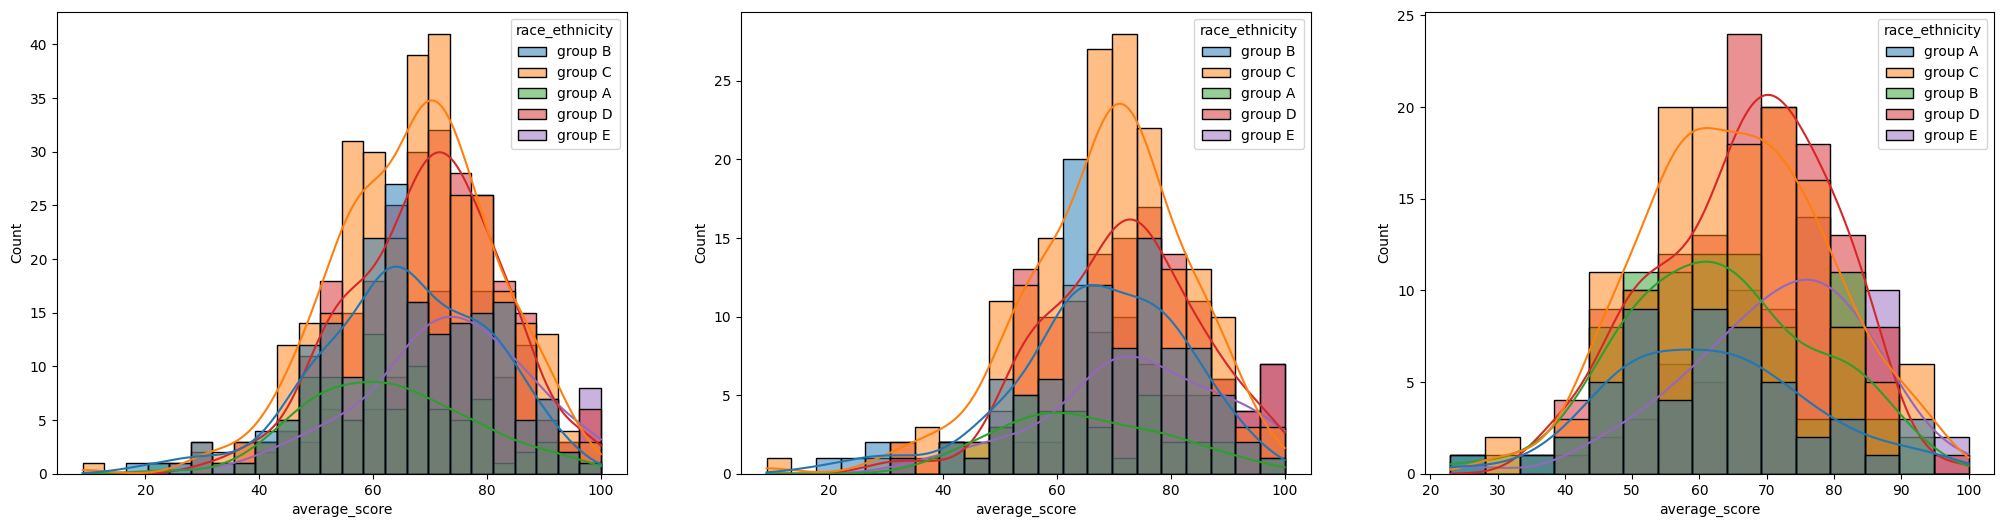

In [71]:
# Explore More Visualization 
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x="average_score", hue="race_ethnicity", kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="race_ethnicity", kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x="average_score", hue="race_ethnicity", kde=True)
plt.show()

## **Insights or Observation**
- Students of Group A and Group B tends to perform poorly in exam.
- Students of Group A and Group B tends to perform poorly in exam irrespective of wheather they are male or female

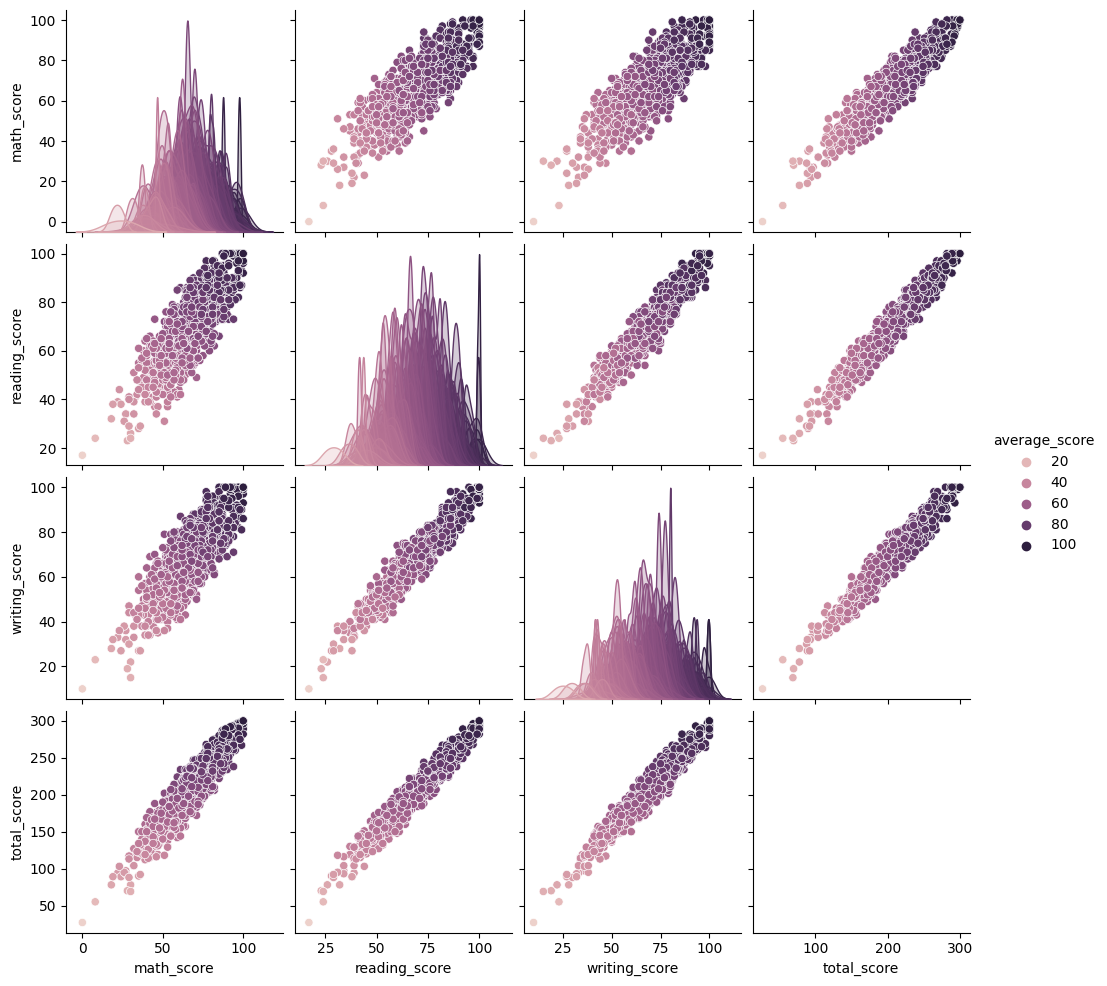

In [72]:
# Multivariate Analysis
sns.pairplot(df, hue="average_score")

<Axes: >

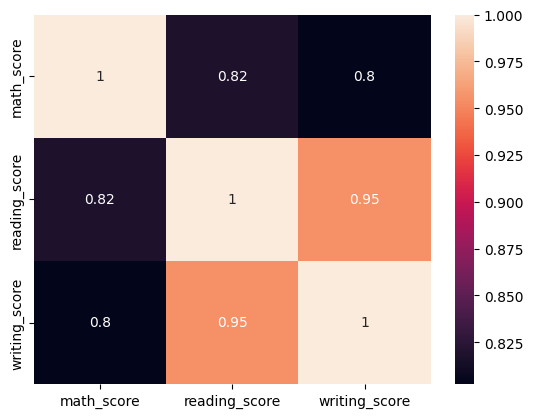

In [79]:
# Correlation using heatmap
sns.heatmap(df[numerical_features].corr(), annot=True)